In [1]:
import pandas as pd
import numpy as np
import re

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder

In [2]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack import preprocessing as ppro

## Dataset

In [3]:
train_data = pd.read_csv("../DataSets/IMDB_Urdu_Reviews/train.csv")
test_data = pd.read_csv("../DataSets/IMDB_Urdu_Reviews/test.csv")

train_data.head(), test_data.head()

(                                              review sentiment
 0  میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...  positive
 1  چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...  negative
 2  ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...  positive
 3  مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...  negative
 4  یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...  positive,
                                               review sentiment
 0  یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...  negative
 1  بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...  negative
 2  یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...  negative
 3  اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...  positive
 4  پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...  positive)

In [4]:
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [5]:
# Make copy of a dataset
df =  data.copy()
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


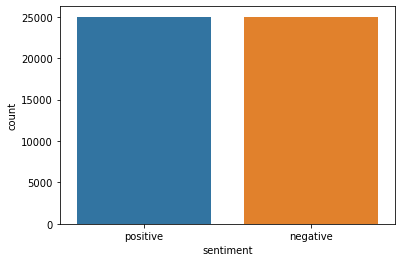

In [6]:
sns.countplot( x = 'sentiment', data = df );

## Preprocessing

In [7]:
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

#### Urdu Stop Words

In [8]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [9]:
def preprocessing(text):
    text = normalize(text)
    text = ppro.normalize_whitespace(text)
    text = ppro.remove_punctuation(text)
    text = ppro.remove_accents(text)
    text = ppro.replace_urls(text)
    text = ppro.replace_emails(text)
    text = ppro.replace_phone_numbers(text)
    text = ppro.replace_numbers(text)
    text = ppro.replace_currency_symbols(text)
    text = ppro.remove_english_alphabets(text)    
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'<br />', ' ', text)
    text = remove_stopwords(text)

    return text

df["review"] = df["review"].apply(preprocessing)

In [10]:
# df[['review']].head(10)
df[['review']].loc[0]

review    دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
Name: 0, dtype: object

In [11]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [12]:
df['review'] =  df['review'].apply(remove_stopwords)

In [13]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [16]:
import spacy
nlp = spacy.blank('ur')
def tokenizer(str):
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]

In [17]:
df["tokens"] = df["lemmatized_text"].apply(tokenizer)

In [20]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text,tokens
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,"[دہائی, وسط, کیبل, گائیڈ, اسکائینجر, ہنٹ, پہلو..."
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,"[دہائی, انسپکٹر, گیجٹ, کارٹون, پسند, فلم, دیکھ..."
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,"[معاشرے, حالت, تعجب, والد, پیدا, البرٹ, ٹی, فٹ..."
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,"[مفید, البرٹ, پیون, ردی, ٹوکری, گریڈ, زیڈ, جلد..."
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,"[کولمبو, ہدایتکاری, کیریئر, ابتدائی, وقت, اسٹی..."


In [23]:
df[['lemmatized_text', 'encoded_sentiments', "tokens"]].to_csv("../DataSets/IMDB_Urdu_Reviews/preprocessed.csv")

In [24]:
pd.read_csv("../DataSets/IMDB_Urdu_Reviews/preprocessed.csv")

,Unnamed: 0,lemmatized_text,encoded_sentiments,tokens
0,0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,1,"['دہائی', 'وسط', 'کیبل', 'گائیڈ', 'اسکائینجر',..."
1,1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,0,"['دہائی', 'انسپکٹر', 'گیجٹ', 'کارٹون', 'پسند',..."
2,2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,1,"['معاشرے', 'حالت', 'تعجب', 'والد', 'پیدا', 'ال..."
3,3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,0,"['مفید', 'البرٹ', 'پیون', 'ردی', 'ٹوکری', 'گری..."
4,4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,1,"['کولمبو', 'ہدایتکاری', 'کیریئر', 'ابتدائی', '..."
...,...,...,...,...
49995,49995,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...,1,"['چیخنا', 'بڑے', 'اسٹوڈیو', 'ہارر', 'پراڈکٹ', ..."
49996,49996,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...,1,"['براہ', 'راست', 'چھوٹی', 'چھوٹی', 'چھوٹی', 'چ..."
49997,49997,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...,0,"['فلم', 'کل', 'رات', 'آدھی', 'رات', 'چپکے', 'پ..."
49998,49998,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...,1,"['دیکھنا', 'آسان', 'فلم', 'تین', 'گھنٹے', 'زیا..."
